In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re #regex
import pandas as pd
import joblib #load, dump pkl
from underthesea import word_tokenize #word_tokenize of lines
import numpy as np
from transformers import BertModel, BertTokenizer
import torch
from nltk import ngrams
from underthesea import word_tokenize
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import os
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# # scrap comment = selenium
from selenium import webdriver 
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from time import sleep
import bs4 
import random
import pickle

In [83]:
df = pd.read_excel("Tiki.xlsx")

In [84]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Comment,Label
0,0,0,vợt rất tốt có luôn 2 màu xanh hồng phù hợp ...,0.0
1,1,1,Ok nhận nhanh gói cẩn thận chưa dùng nhưng th...,0.0
2,2,2,"Vợt đánh tốt phù hợp với học sinh,0",0.0
3,3,3,"sản phần cứng cáp gjao hàng nhanh,0",0.0
4,4,4,"Vợt đẹp nhẹ Tốt,0",0.0


In [85]:
len(df)

2417

In [86]:
def standardize_data(row):
    # remove stopword
    # Remove . ? , at index final
    row = re.sub(r"[\.,\?]+$-", "", row)
    # Remove all . , " ... in sentences
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")

    row = row.strip()
    return row

In [87]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [88]:
def removeEnd(text):
    return text.replace('1','').replace('0','')

In [89]:
df = df.dropna()
df['Comment'] = df['Comment'].apply(str)

In [90]:
len(df)

2181

In [91]:
df['Comment'] = df['Comment'].apply(standardize_data)
df['Comment'] = df['Comment'].apply(deEmojify)
df['Comment'] = df['Comment'].apply(removeEnd)

In [92]:
def tokenizer_(row):
    return word_tokenize(row, format="text")

In [93]:
print(df.iloc[10]['Comment'])

ok  giao hàng nhanh  đóng gói kĩ càng  Well done 


In [94]:
df['Comment'] = df['Comment'].apply(tokenizer_)
x_train = df['Comment']

In [95]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>' ) 
tokenizer.fit_on_texts(x_train)
X = tokenizer.texts_to_sequences(x_train)
X = pad_sequences(X)

In [96]:
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [97]:
y_train = df['Label']

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=42)

In [99]:
max_length = 200

In [100]:
X_train =tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen=max_length,truncating='post',padding='post')
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,maxlen=max_length,truncating='post',padding='post')

In [101]:
len(X_train[1])

200

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,SimpleRNN,LSTM,Bidirectional
from tensorflow.keras.layers import GlobalAvgPool1D
from sklearn.preprocessing import OneHotEncoder

In [103]:
# Y_train = np.array([Y_train]).reshape(-1,1).astype(int)
# Y_test = np.array([Y_test]).reshape(-1,1).astype(int)


In [104]:
lb = LabelEncoder()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [105]:
X_train[0]

array([  61,   58, 2285,   16,  187,  758,   51,  145,  109,   58,  327,
        572,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [106]:
Y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
model = Sequential()
model.add(Embedding(10000, 64,input_length=len(X_train[0])))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200, 64)           24832     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 740,193
Trainable params: 740,193
Non-trainable params: 0
________________________________________________

In [109]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
H = model.fit(X_train,Y_train,validation_data=(X_test,Y_test) , epochs= 10 ,batch_size = 32)

Epoch 1/10
55/55 [==============================] - 26s 347ms/step - loss: 0.4503 - acc: 0.8544 - val_loss: 0.3740 - val_acc: 0.8764
Epoch 2/10
55/55 [==============================] - 17s 312ms/step - loss: 0.2743 - acc: 0.8951 - val_loss: 0.2763 - val_acc: 0.8993
Epoch 3/10
55/55 [==============================] - 17s 317ms/step - loss: 0.1389 - acc: 0.9484 - val_loss: 0.3480 - val_acc: 0.8787
Epoch 4/10
55/55 [==============================] - 17s 318ms/step - loss: 0.0896 - acc: 0.9725 - val_loss: 0.3479 - val_acc: 0.8650
Epoch 5/10
55/55 [==============================] - 18s 330ms/step - loss: 0.0706 - acc: 0.9782 - val_loss: 0.4122 - val_acc: 0.8970
Epoch 6/10
55/55 [==============================] - 18s 334ms/step - loss: 0.0536 - acc: 0.9862 - val_loss: 0.4277 - val_acc: 0.8787
Epoch 7/10
55/55 [==============================] - 18s 329ms/step - loss: 0.0513 - acc: 0.9839 - val_loss: 0.3964 - val_acc: 0.8696
Epoch 8/10
55/55 [==============================] - 19s 338ms/step - 

In [110]:
model.evaluate(X_test,Y_test)

14/14 [==============================] - 2s 118ms/step - loss: 0.4045 - acc: 0.8879


[0.404494047164917, 0.8878718614578247]

In [111]:
model.save('chechpoint.h5')

No handles with labels found to put in legend.


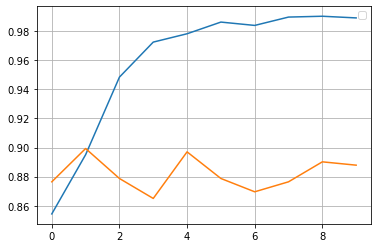

In [112]:
acc = H.history['acc']
val_acc = H.history['val_acc']
n = range(len(acc))
plt.plot(n,acc)
plt.plot(n,val_acc)
plt.grid()
plt.legend()
plt.show()

In [113]:
from keras.models import load_model

In [114]:
model1 = load_model('chechpoint.h5')

In [115]:
model1.evaluate(X_test,Y_test)

14/14 [==============================] - 4s 97ms/step - loss: 0.4045 - acc: 0.8879


[0.404494047164917, 0.8878718614578247]

In [116]:
t = str('Giao hành nhanh hơn dự kiến  lần đầu tiên mình nhận được một cái hộp móp méo như vậy từ Tiki luôn  có lẽ là do bên vận chuyển  mình mua 4 cuốn hết 3 cuốn không có bookcare  hên là chỉ bị sướt một chút  hơi buồnChưa bàn đến nội dung  sách đẹp cực kì  không bị ố vàng  ưng cái bụng')
std_t = standardize_data(t)
del_t = deEmojify(std_t)
re_t = removeEnd(del_t)
tok_t = tokenizer_(re_t)
text_t = tokenizer.texts_to_sequences(np.array([tok_t]))
pad_t = pad_sequences(text_t,maxlen=len(X_train[0]),truncating='post',padding='post')

In [117]:
pad_t

array([[   6,  379,   15,   38,  322,  282,   69,  103,  388,    3,   48,
          20,   73,   64,  121,  326,  299,   24,  194,  155,   34,   54,
           4,  661,   13,  203,  136,  241,  238,    3,   11,  237,   85,
         163,  186,   85,    9,    4,  748, 1445,   13,   89,   32, 1638,
          73,  242,   58,    1,  281,  142,  115,  110,    8,    7,  139,
         431,    9,   32, 1868,  561,  134,   64,  664,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [118]:
result = model1.predict(pad_t)

In [119]:
result

array([[0.71060175]], dtype=float32)

In [120]:
if result > 0.5:
    print("San pham khong tot")
else:
    print("San pham tot")

San pham khong tot
